# Project: Investigate a Dataset - No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset we are working is No-show appointments data set (. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

I will analyze and communicate my findings using Python libraries (NumPy, Pandas, Matplotlib, and seaborn).


#### Column names in each table
    Name            Significance

    PatientId:       Identification of patient
    AppointmentID:   Identification of each appointment
    Gender:          Male (M) or Female (F)
    ScheduledDay:    Time expected for appointment
    AppointmentDay:  Actual day of appointment 
    Age:             How old the patient is
    Neighbourhood:   Where the appointment takes place
    Scholarship:     True (1) of False (0) 
    Hipertension:    Medical condition 
    Diabetes:        Medical condition
    Alcoholism:      Medical condition
    Handcap:         Medical condition
    SMS_received:    Messages sent to the patient
    No-show:         Yes or No


### Question(s) for Analysis
1. Research Question 1: What is the rate of those who did not show up vs. those who showed up?
2. Research Question 2: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [4]:
# Importing statements for all of the packages to be used

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.7MB/s ta 0:00:011   12% |████                            | 1.3MB 13.7MB/s eta 0:00:01    63% |████████████████████▍           | 6.7MB 28.5MB/s eta 0:00:01    80% |█████████████████████████▋      | 8.4MB 23.1MB/s eta 0:00:01    91% |█████████████████████████████▍  | 9.6MB 13.6MB/s eta 0:00:01    97% |███████████████████████████████▎| 10.2MB 11.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.0MB/s eta 0:00:01  4% |█▎                              | 542kB 12.8MB/s eta 0:00:02    17% |█████▌                          | 2.3MB 12.5MB/s eta 0:00:01    21% |███████                         | 2.9MB 27.6MB/s eta 0:00:01    26% |████████▍                       | 3.5MB 11.5MB/s eta 0:00:01    43% |██████████████                  | 5.9MB 13.2MB/s eta 0:00:01    48% |███████████████▌                | 6.5MB 27.4MB/s eta 0:00:01    57% |██████████████████▎             | 7.7MB 11.5MB/s eta 0:00:01    74% |███████████████████████▉ 

<a id='wrangling'></a>
## Data Wrangling


In [200]:
#Loading the dataset 
df = pd.read_csv('noshowappointments.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Checkign for data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above, it is evident that some columns have incorrect data types. The "ScheduledDay" and "AppointmentDay" should contaub string objects not object types. 

This will be converted to datetime types in the cleanup section. 

In [7]:
#Checking for dataset shape
df.shape

(110527, 14)

Reference
https://pythonexamples.org/pandas-dataframe-shape/

From the results, the dataset has 110527 records and 14 columns. 

In [14]:
#Checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in this dataset 

There are some typos in the dataset 'Hipertension' will be changed to 'Hypertension' and 'Handcap' will be changed to 'Handicap.'

In [8]:
#Descriptive summary of the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the output, it is the minimum age is -1. Therefore, we will drop it because there is no negative age. 

In [11]:
#dropping the -1 value 
df.drop(df.query("Age == -1").index,inplace=True)

Reference
https://www.w3schools.com/python/pandas/ref_df_drop.asp

In [210]:
#Confirming if the minimum age is okay now 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As seen above, the minimum age has been set to 0. 

In [212]:
df.duplicated().sum()

0

It is evident that there are no duplicate values in the dataset 

In [211]:
#Returning the number of unique values for each column
print(df.nunique())

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


Reference
https://www.w3schools.com/python/pandas/ref_df_nunique.asp#:~:text=The%20nunique()%20method%20returns,unique%20values%20for%20each%20row.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [216]:
#Correcting typos 
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [218]:
#Fixing datatypes errors
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [219]:
#Converting no show data to 0 and 1
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No-show'] = pd.to_numeric(df['No_show'])


C:\Users\owner\anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\owner\anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Converting no to 0 and yes to 1 will help when using groupby or plot in the subsequent sections.  

In [107]:
#Dropping columns that are not needed in the analysis

df.drop(['AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_bin10
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,"(60, 70]"
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,"(50, 60]"
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,"(60, 70]"
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,"(0, 10]"
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,"(50, 60]"


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the rate of those who did not show up vs. those who showed up? 

This will be represented using a pie chart showing the percentage of those who showed up and not. 

20.193255946510806


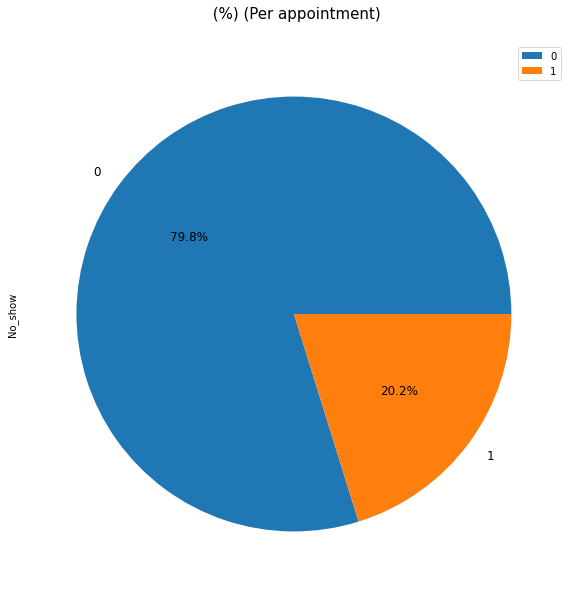

In [221]:
allP = df['No_show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title(' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

This indicates that the percentage of those who did not show up is low as compared to those who showed up. 

### Research Question 2: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### The are different aspects towards understanding the different factors that can predict if a patient will show up for their schedule appointment. Therefore, we need to bring the correlation between: 
1. Appointment and age
2. Appointment and gender 
3. Appointment adn neighborhood 
4. Appointment and scholarship 
5. Appointment and hypertension 
6. Appointment and diabetes 
7. Appointment and alcoholism 
8. Appointment and handicap
8. Appointment and sms received

#### Correlation between age and showing up for scheduled appointment 

In [67]:
miss = df["No_show"] == "Yes"
show = df["No_show"] == "No"

In [223]:
#value counts for no_show 
Age_count = df.groupby("Age")["No_show"].value_counts()
Age_count

Age   No_show
-1    0             1
 0    0          2900
      1           639
 1    0          1858
      1           415
                 ... 
 99   0             1
 100  0             4
 102  0             2
 115  1             3
      0             2
Name: No_show, Length: 204, dtype: int64

In [225]:
#Value counts for age 
Age_count.groupby(level=0).sum()

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: No_show, Length: 104, dtype: int64

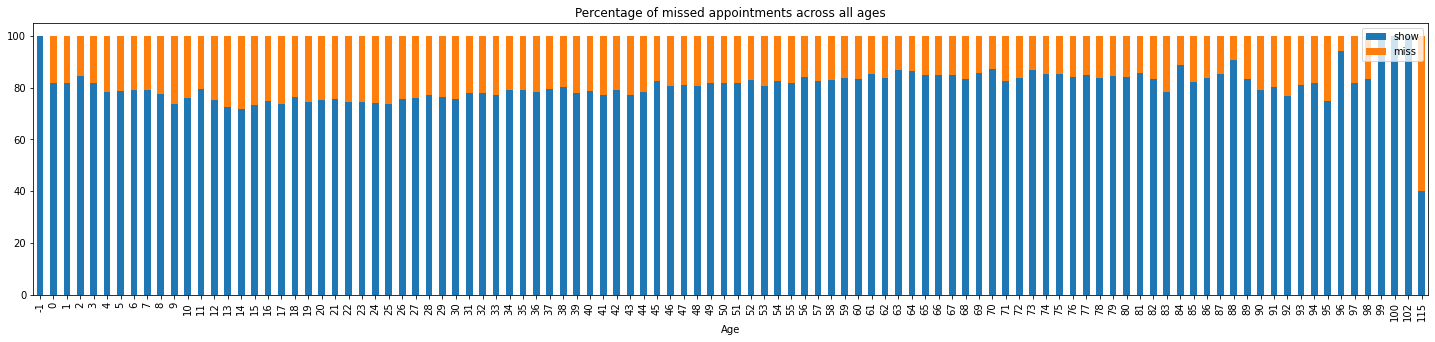

In [227]:
#Bar plot for patients of all ages who missed their appointments 

round(Age_count / Age_count.groupby(level=0).sum() * 100,2).unstack().plot(kind="bar",stacked=True, figsize=(25,5));
plt.legend(["show","miss"]);
plt.title("Percentage of missed appointments across all ages");

In [82]:
#percentage mean value for patients missing and showed appointments as per thier ages
print("The mean value of patient missing the appointment for the age:")
round(Age_count / Age_count.groupby(level=0).sum() * 100,2).unstack().mean()

The mean value of patient missing the appointment for the age:


No_show
0    80.727864
1    19.850300
dtype: float64

In [71]:
#Bucketing ages to have a clear look of each age group 

bins=[0,10,20,30,40,50,60,70,80,90,100,120]
df["Age_bin10"] = pd.cut(df.Age, bins=bins)
Age10_count = df.groupby("Age_bin10")["No_show"].value_counts()

In [72]:
Age10_count

Age_bin10   No_show
(0, 10]     0          12061
            1           3149
(10, 20]    0           9791
            1           3308
(20, 30]    0          10389
            1           3394
(30, 40]    0          11820
            1           3232
(40, 50]    0          11550
            1           2870
(50, 60]    0          12940
            1           2721
(60, 70]    0           9541
            1           1648
(70, 80]    0           4832
            1            889
(80, 90]    0           2137
            1            407
(90, 100]   0            242
            1             59
(100, 120]  0              4
            1              3
Name: No_show, dtype: int64

Reference
https://python-course.eu/numerical-programming/binning-in-python-and-pandas.php

Text(0.5, 1.0, 'Percentage of Missing appointment across ages')

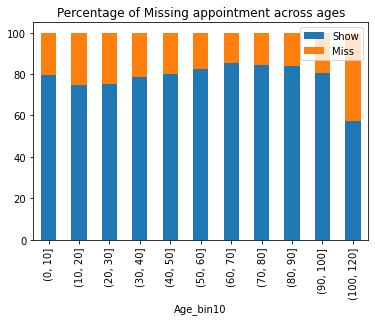

In [75]:
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(["Show","Miss"]);
plt.title("Percentage of Missing appointment across ages")

In [76]:
(Age10_count/Age10_count.groupby(level=0).sum()*100)

Age_bin10   No_show
(0, 10]     0          79.296515
            1          20.703485
(10, 20]    0          74.746164
            1          25.253836
(20, 30]    0          75.375463
            1          24.624537
(30, 40]    0          78.527770
            1          21.472230
(40, 50]    0          80.097087
            1          19.902913
(50, 60]    0          82.625631
            1          17.374369
(60, 70]    0          85.271249
            1          14.728751
(70, 80]    0          84.460759
            1          15.539241
(80, 90]    0          84.001572
            1          15.998428
(90, 100]   0          80.398671
            1          19.601329
(100, 120]  0          57.142857
            1          42.857143
Name: No_show, dtype: float64

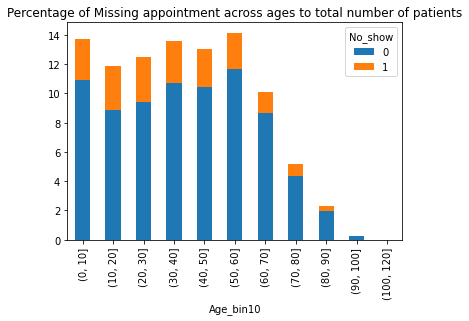

In [81]:
#ratio to all patients 
(Age10_count/len(df)*100).unstack().plot(kind="bar",stacked=True);
plt.title("Percentage of Missing appointment across ages to total number of patients");

In [103]:
# percentages of no show patients based on age group
No_show = df.groupby('Age').No_show.mean() * 100



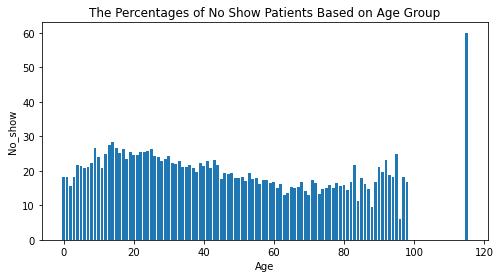

In [105]:
# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = No_show.index, height = No_show)
plt.title('The Percentages of No Show Patients Based on Age Group')
plt.xlabel('Age')
plt.ylabel('No_show');

Reference
https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
https://www.codegrepper.com/code-examples/python/bin+age+groups+in+python+


From the above analysis, there is a link between age and patients missing appointments. 

The mean value of patient missing the appointment for the age is 19.8 and those who showed up is 80.2 indicating that most of the patients across all ages showed up for their appointments. 

Besides, it is evident that patients aged between 15 to 35 years missed most of their appointments. 

#### Correlation between gender and showing up for scheduled appointment

In [90]:
##value counts for no_show 
Gender_count = df.groupby("Gender")["No_show"].value_counts()
print(Gender_count)

Gender  No_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


% of women missed their appointment:  20.31
% of males who missed their appointment  :  19.97


Text(0.5, 1.0, '% of male and females')

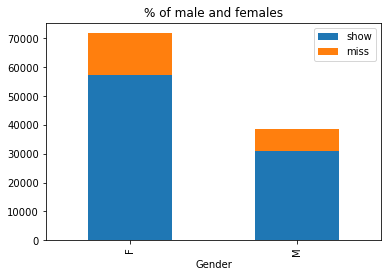

In [136]:
#Bar plot for patients of all genders who missed their appointments 

print("% of women missed their appointment: ",round(Gender_count[1]/(Gender_count[0]+Gender_count[1])*100,2))
print("% of males who missed their appointment  : ",round(Gender_count[3]/(Gender_count[3]+Gender_count[2])*100,2))
df.groupby("Gender")["No_show"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["show","miss"]);
plt.title("% of male and females")

The % of women who missed their appointment 20.31 whereas that of males who missed their appointment is 19.97.

This cannot be a factor for missing appointments since the percentages are approximately similar (20% when rounded off). 

#### Correlation between neighborhood and showing up for scheduled appointment


In [109]:
##value counts for no_show 
Neighbourhood_count = df.groupby("Neighbourhood")["No_show"].value_counts()
print(Neighbourhood_count)

Neighbourhood    No_show
AEROPORTO        0             7
                 1             1
ANDORINHAS       0          1741
                 1           521
ANTÔNIO HONÓRIO  0           221
                            ... 
TABUAZEIRO       1           573
UNIVERSITÁRIO    0           120
                 1            32
VILA RUBIM       0           710
                 1           141
Name: No_show, Length: 160, dtype: int64


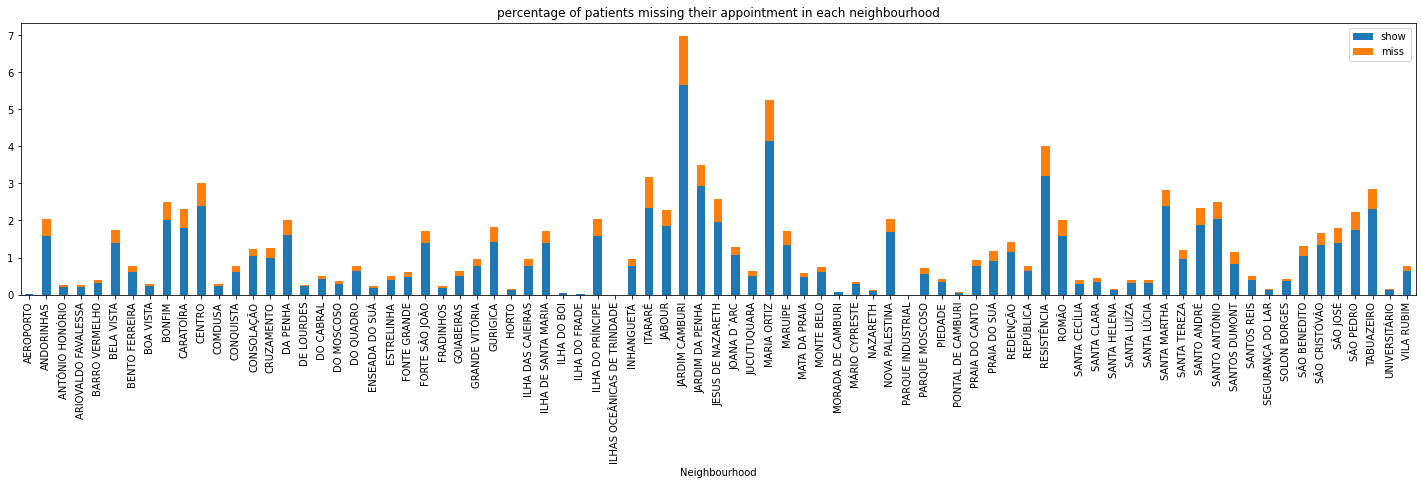

In [231]:
#Bar plot for patients of all neighbourhood who missed their appointments 

round(Neighbourhood_count / len(df) * 100,2).unstack().plot(kind="bar",stacked=True, figsize=(25,5));
plt.legend(["show","miss"]);
plt.title("percentage of patients missing their appointment in each neighbourhood");

In [138]:
print("The mean value for the percentage of patients missing appointments in all neighbourhood:",
      round((Neighbourhood_count / Neighbourhood_count.groupby(level=0).sum() * 100).unstack().mean(),2))



The mean value for the percentage of patients missing appointments in all neighbourhood: No_show
0    80.45
1    20.80
dtype: float64


JARDIM CAMBURI neighbourhood had the heighest number of missed appointments. 

The mean value for the percentage of patients missing appointments in all neighbourhood is 80 while those showing up is 20. This indicates that patients from those from the neighbourhood have many missed appointments. 

#### Correlation between health conditions (alcoholism, diabetes, hypertension and handicap) and showing up for scheduled appointment

In [148]:
df['number_of_cond'] = df.Hypertension + df.Diabetes + df.Alcoholism + df.Handicap

In [149]:
# empty dictionary 
cond_dict = {}

# percentage of no show patients who suffered from hypertension only
cond_dict['Hypertension'] = (df[df.number_of_cond <= 1].groupby('Hypertension').No_show.mean() * 100)[1]
# percentage of no show patients who suffered from diabetes only
cond_dict['Diabetes'] = (df[df.number_of_cond <= 1].groupby('Diabetes').No_show.mean() * 100)[1]
# percentage of no show patients who suffered from alcoholism only
cond_dict['Alcoholism'] = (df[df.number_of_cond <= 1].groupby('Alcoholism').No_show.mean() * 100)[1]
# percentage of no show patients who were handicapped only
cond_dict['Handicapped'] = (df[df.number_of_cond <= 1].groupby('Handicap').No_show.mean() * 100)[1]

# percentage of no show patients who suffered from multiple conditions
cond_dict['Multiple Conditions'] = df[df.number_of_cond > 1].No_show.mean() * 100

cond_dict

{'Hypertension': 17.016760594305786,
 'Diabetes': 20.3579418344519,
 'Alcoholism': 21.644120707596255,
 'Handicapped': 20.128676470588236,
 'Multiple Conditions': 17.658966420576327}

In [153]:
# converting the dictionary to a pandas series
cond_ser = pd.Series(cond_dict)
cond_ser

Hypertension           17.016761
Diabetes               20.357942
Alcoholism             21.644121
Handicapped            20.128676
Multiple Conditions    17.658966
dtype: float64

References
https://www.machinelearningplus.com/pandas/creating-pandas-series-from-dictionary/#:~:text=To%20make%20a%20series%20from,the%20values%20of%20the%20series.

https://www.geeksforgeeks.org/how-to-convert-a-dictionary-to-a-pandas-series/

https://www.w3resource.com/python-exercises/pandas/python-pandas-data-series-exercise-5.php


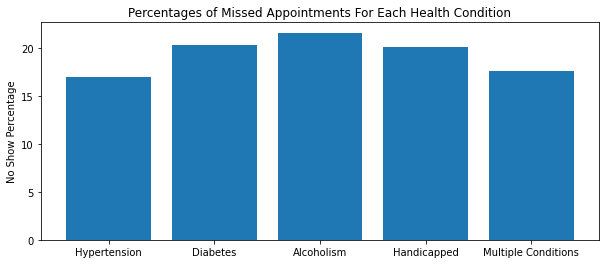

In [155]:
# ploting a bar chart
plt.figure(figsize = [10, 4])
plt.bar(x = cond_ser.index, height = cond_ser)
plt.title('Percentages of Missed Appointments For Each Health Condition')
plt.ylabel('No Show Percentage');

Alcoholic patients have the highest percentage of missed appointments 

The health conditions (alcoholism, diabetes, hypertension and handicap) is a factor to missed appointments. 

#### Correlation between scholarship and showing up for scheduled appointment

In [156]:
##value counts for no_show 
Scholarship_count = df.groupby("Scholarship")["No_show"].value_counts()
print(Scholarship_count)

Scholarship  No_show
0            0          79924
             1          19741
1            0           8283
             1           2578
Name: No_show, dtype: int64


In [168]:
print("The mean value for Patients with scholarship who missed their appointment:",
      round((Scholarship_count / Scholarship_count.groupby(level=0).sum() * 100).unstack().mean(),2))

The mean value for Patients with scholarship who missed their appointment: No_show
0    78.23
1    21.77
dtype: float64


Patients with scholarship who missed their appointment:  No_show
0     9.39
1    11.55
Name: No_show, dtype: float64


Text(0.5, 1.0, 'No. of patients showed based on scholarship')

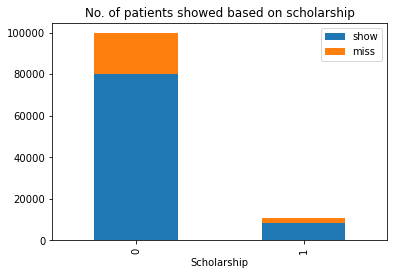

In [167]:
print("Patients with scholarship who missed their appointment: ",round(Scholarship_count[1]/(Scholarship_count[0]+Scholarship_count[1])*100,2))
df.groupby("Scholarship")["No_show"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["show","miss"]);
plt.title("No. of patients showed based on scholarship")

From the above output, a high number of patients with scholarship missed their appointments as opposed to those without scholarship.

This indicates that a scholarship is an indicator of appointments. 

#### Correlation between sms received and missed their appointment

In [173]:
print(df.groupby('SMS_received').mean())

                 PatientId        Age  Scholarship  Hypertension  Diabetes  \
SMS_received                                                                 
0             1.492089e+14  36.888465     0.098022      0.198963   0.07445   
1             1.438652e+14  37.513810     0.098782      0.193619   0.06640   

              Alcoholism  Handicap   No_show  number_of_cond  
SMS_received                                                  
0               0.033487  0.024932  0.167035        0.331832  
1               0.023871  0.016572  0.275745        0.300462  


In [197]:
SMS_count = df.groupby("SMS_received")["No_show"].value_counts()
SMS_count

SMS_received  No_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: No_show, dtype: int64

In [193]:
SMS_YN = (SMS_count / SMS_count.groupby(level=0).sum() * 100).unstack()
SMS_YN.index = ["NOt Received", "Received"]
SMS_YN

No_show,0,1
NOt Received,83.296466,16.703534
Received,72.425455,27.574545


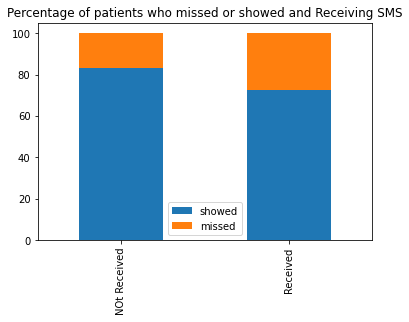

In [233]:
SMS_YN.plot(kind="bar",stacked=True)
plt.legend(["showed","missed"])
plt.title("Percentage of patients who missed or showed and Receiving SMS");

The above output indicates that majority of the patients did not receive SMS and they had a lower percentage to missing appointments as opposed to those who received.

Therefore, it shows that receiving SMS has no effect on patients showing up for appointments. 

<a id='conclusions'></a>
## Conclusions

I investigated the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment and these are the results of these analyses: 

- The percentage of those who did not show up is low as compared to those who showed up. 20% never showed up whereas 80% of the patients showed up for the appointment. 

- The factors that have a include age, neighborhood, health conditions (alcoholism, diabetes, hypertension and handicap) and scholarship. 

- The mean value of patient missing the appointment for the age is 19.8 and those who showed up is 80.2 indicating that most of the patients across all ages showed up for their appointments. Also, it was evident that patients aged between 15 to 35 years missed most of their appointments.

- The mean value for the percentage of patients missing appointments in all neighbourhood is 80 while those showing up is 20. This indicates that patients from those from the neighbourhood have many missed appointments. Also, JARDIM CAMBURI neighbourhood had the heighest number of missed appointments. 

- The health conditions (alcoholism, diabetes, hypertension and handicap) is a factor to missed appointments with alcoholic patients have the highest percentage of missed appointments. 

- A high number of patients with scholarship missed their appointments as opposed to those without scholarship.
 
#### Limitation 
The SMS_received column was not clear on the dataset page since it was difficult to derive if it was a factor for missed appointments. This shows why receiving SMS has no effect on patients showing up for appointments from our analyses. 






In [232]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1